In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('traincleaned.csv')

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.025077,0.042033,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.122230,-0.298088,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.375830,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217,4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
0                   200000 non-null float64
1                   200000 non-null float64
2                   200000 non-null float64
3                   200000 non-null float64
4                   200000 non-null float64
5                   200000 non-null float64
6                   200000 non-null float64
7                   200000 non-null float64
8                   200000 non-null float64
9                   200000 non-null float64
loan_amount         200000 non-null float64
applicant_income    200000 non-null float64
rate_spread         200000 non-null int64
dtypes: float64(12), int64(1)
memory usage: 19.8 MB


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,0.453525,0.531540,0.005410,0.009525,0.846310,0.152500,0.001190,0.730515,0.056365,0.213120,3.992973e-17,2.617209e-16,1.974370
std,0.497837,0.499005,0.073354,0.097130,0.360652,0.359506,0.034476,0.443693,0.230626,0.409513,1.000003e+00,1.000003e+00,1.593451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.930963e-01,-6.965148e-01,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.301305e-01,-3.175233e-01,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.864135e-01,-1.620397e-01,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.555084e-01,7.118587e-02,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.689038e+01,9.687922e+01,8.000000


In [6]:
df1.shape

(200000, 13)

In [7]:
array = df1.values

In [8]:
type(array)

numpy.ndarray

In [9]:
X = array[:,0:12]
y = array[:,12]

In [10]:
X.shape

(200000, 12)

In [11]:
y.shape

(200000,)

### Using Grid Search to find best parameters

In [12]:
model = tree.DecisionTreeRegressor(random_state=0)

In [13]:
params_grid = {"max_depth":[10,15,20,25,30],
               "min_samples_split":[5,10,15,20]    
              }

In [14]:
grid_search_tree = GridSearchCV(model,params_grid,scoring='r2',n_jobs=-1,cv=5,verbose=True)

In [15]:
grid_search_tree.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_split': [5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [16]:
grid_search_tree.best_params_

{'max_depth': 10, 'min_samples_split': 20}

In [19]:
besttree = grid_search_tree.best_estimator_

### Load in test set

In [20]:
X_test = pd.read_csv('testmodified.csv')

In [21]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.665492,-0.218602
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.185659,0.774446
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.213116,0.273193
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.185004,-0.209144
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.239917,0.140787


In [22]:
X_test.shape

(200000, 12)

In [23]:
y_predict = besttree.predict(X_test)

In [24]:
y_predict

array([5.28025478, 1.63838384, 1.63838384, ..., 1.26434692, 1.25992038,
       1.15089286])

In [25]:
y_predict.shape

(200000,)

In [26]:
treeprediction = pd.DataFrame(y_predict)

In [27]:
treeprediction

,0
0,5.280255
1,1.638384
2,1.638384
3,1.597972
4,1.638384
...,...
199995,1.739955
199996,2.674112
199997,1.264347
199998,1.259920


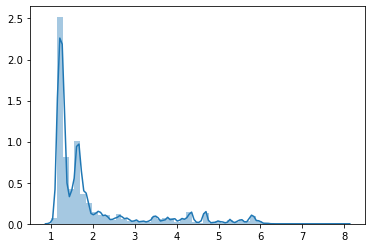

In [28]:
sns.distplot(treeprediction)

In [29]:
MSE = mean_squared_error(y,y_predict)
print("Mean Squared Error is", MSE)

Mean Squared Error is 3.898099768508004


In [30]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

RMSE is 1.974


In [31]:
MAE = mean_absolute_error(y,y_predict)
print("MAE is", MAE)

MAE is 1.3328157662112783


In [32]:
r2 = r2_score(y,y_predict)
print("R2 score is", r2)

R2 score is -0.5352451899666633


In [33]:
treeprediction.to_csv('treeresult.csv')

**Score is 0.5307**